<center><font color="green" size="6"> <b>Sugarcane Yield Prediction using RS and ML<b> </font></center>
<center><img src="https://www.omex.com/wp-content/uploads/2020/10/Sugar-Cane-Harvest-1536x772.jpg" height="150"></center>

---

_Script elaborated by **Raul Roberto Poppiel**_ ([raulpoppiel@gmail.com](raulpoppiel@gmail.com)) for the [FAPESP](https://fapesp.br/en) project Nº [23/01062-1](https://bv.fapesp.br/en/bolsas/207973/satellite-imagery-and-machine-learning-for-sugarcane-yield-estimation-in-regions-of-sao-paulo-state/).

# Process shapefile

Import the required modules

In [ ]:
# Import necessary libraries
import os
import geopandas as gpd
import pandas as pd
from pathlib import Path

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Merge shapefiles

Define the path to your Google Drive where the zipped shapefiles are located and the pattern to match

In [ ]:
# Define folder names
folder_name_root = 'Colab Notebooks'
folder_name_project = '01_SugarcaneYieldPrediction'
folder_name_farm = '02_usinas_all'
folder_name_specific = '01_input_data'

# Define a common name for the files to export
file_name = 'SAFRA'

In [ ]:
# Check if the folder exists or else create
root_path = f'/content/drive/MyDrive/{folder_name_root}'
project_path = f'{root_path}/{folder_name_project}'
farm_path = f'{project_path}/{folder_name_farm}'
out_path = f'{farm_path}/{folder_name_specific}' # your results will be stored in 'out_path'

if not os.path.exists(out_path):
  Path(out_path).mkdir(parents=True, exist_ok=True)
  print("Output directory created successfully.")
else:
  print("Output directory already exists.")

os.chdir(out_path)
print(os.getcwd(),'\n')  # Print the current working directory
pd.DataFrame(os.listdir(), columns=['List files'])  # List files and directories in the current directory

Output directory already exists.
/content/drive/MyDrive/Colab Notebooks/01_SugarcaneYieldPrediction/02_usinas_all/00_input_data 



'List files:'

,0
0,usinas_merge_Dez22_dissolve_joinedData_epsg432...
1,usinas_merge_Dez22_dissolve_joinedData_epsg432...
2,usinas_merge_Dez22_dissolve_joinedData_epsg432...
3,usinas_merge_Dez22_dissolve_joinedData_epsg432...
4,usinas_merge_Dez22_dissolve_joinedData_epsg432...


## Import shapefile

In [ ]:
# Load the merged shapefile from Google Drive
shp_path = f'{out_path}/usinas_merge_Dez22_dissolve_joinedData_epsg4326.shp'
shp_path

'/content/drive/MyDrive/Colab Notebooks/01_SugarcaneYieldPrediction/02_usinas_all/00_input_data/usinas_merge_Dez22_dissolve_joinedData_epsg4326.shp'

In [ ]:
gdf = gpd.read_file(shp_path)
gdf

,ID_SIG,Local,AREA,COD_USINA,CODFAZ,BLOCO,TALHAO,VARIEDADE,TCH_ANT,POL,...,Unidade_So,Ordem,relevo,EST_Corte,VAR,SAFRA_real,soloGeral,SAFRA,usina,geometry
0,X19200280001000100000008,Usina 1,30.445290,28,1,0,8,CT961007,61.49,13.31,...,LV21,Latossolos,Suave Ondulado,4,RB855156,1819,LV,1920,M1,"POLYGON Z ((-47.73907 -21.79523 0.00000, -47.7..."
1,X19200280001000100000009,Usina 1,0.567752,28,1,0,9,RB867515,73.93,13.1,...,LV21,Latossolos,Suave Ondulado,1,RB867515,1819,LV,1920,M1,"POLYGON Z ((-47.73192 -21.80117 0.00000, -47.7..."
2,X19200280001000100000010,Usina 1,23.189263,28,1,0,10,RB867515,73.81,13.1,...,LV21,Latossolos,Suave Ondulado,1,RB867515,1819,LV,1920,M1,"POLYGON Z ((-47.73380 -21.79390 0.00000, -47.7..."
3,X19200280001000100000011,Usina 1,26.608630,28,1,0,11,RB867515,73.81,13.1,...,LV21,Latossolos,Suave Ondulado,1,RB867515,1819,LV,1920,M1,"POLYGON Z ((-47.73527 -21.79730 0.00000, -47.7..."
4,X19200280001000100000012,Usina 1,9.164741,28,1,0,12,RB867515,56.23,12.64,...,RQ3,Neossolos,Ondulado e Suave Ondulado,1,RB867515,1819,RQ,1920,M1,"POLYGON Z ((-47.73836 -21.79044 0.00000, -47.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25487,X22230890000016400017005,Usina 3,16.075615,89,164,1,17005,RB867515,40,0,...,PVA4,Argissolos,Suave Ondulado,4,RB867515,2122,PV,2223,M3,"POLYGON Z ((-50.83379 -21.12619 0.00000, -50.8..."
25488,X22230890000016400017006,Usina 3,10.195317,89,164,1,17006,RB867515,40,0,...,PVA4,Argissolos,Suave Ondulado,4,RB867515,2122,PV,2223,M3,"POLYGON Z ((-50.83544 -21.12833 0.00000, -50.8..."
25489,X22230890000016400017007,Usina 3,13.949986,89,164,1,17007,RB867515,40,0,...,LV21,Latossolos,Suave Ondulado,4,RB867515,2122,LV,2223,M3,"POLYGON Z ((-50.83778 -21.12824 0.00000, -50.8..."
25490,X22230890000016400017008,Usina 3,4.658919,89,164,1,17008,RB867515,40,0,...,LV21,Latossolos,Suave Ondulado,4,RB867515,2122,LV,2223,M3,"MULTIPOLYGON Z (((-50.83840 -21.12724 0.00000,..."


## Split and export
- Split the shapefile into shp with smaller number of polygons
    * Split by Safra and then by number of polygons
- Export each shp to GDrive

In [ ]:
# Get unique values in the 'SAFRA' column for splitting
unique_values = gdf['SAFRA'].unique()
list(unique_values)

[1920, 2021, 2122, 2223]

In [ ]:
# Define the numbers of subset to split each SAFRA
num_of_subsets_by_safra = int(15)

In [ ]:
# Split by SAFRA and number of subsets
for value in unique_values:
    subset_gdf = gdf[gdf['SAFRA'] == value]

    num_features = len(subset_gdf)
    num_of_parts = min(num_of_subsets_by_safra, num_features)  # Ensure num_of_parts is not greater than the number of features
    features_per_part = num_features // num_of_parts

    divided_gdfs = []
    for i in range(num_of_parts):
        start_idx = i * features_per_part
        end_idx = (i + 1) * features_per_part if i < int(num_of_parts-1) else num_features
        divided_gdf = subset_gdf.iloc[start_idx:end_idx]
        divided_gdfs.append(divided_gdf)

    # Ensure the SAFRA folder exists
    safra_folder_path = f'{out_path}/{value}'
    if not os.path.exists(safra_folder_path):
        os.makedirs(safra_folder_path)

    # Export the divided GeoDataFrames to shapefiles
    for i, divided_gdf in enumerate(divided_gdfs):
        num_features = len(divided_gdf)
        print(f"Number of features in Divided Shapefile {i+1} (SAFRA {value}): {num_features}")

        if num_features > 0:
            # Export the GeoDataFrame to a shapefile on Google Drive
            export_path = f'{safra_folder_path}/Safra_{value}_{i+1}.shp'
            divided_gdf.to_file(export_path)
            print(f"Divided shapefile {i+1} (SAFRA {value}) exported to Google Drive at: {export_path}")
            print('\n')
        else:
            print(f"Divided Shapefile {i+1} (SAFRA {value}) is empty and will not be plotted or exported.")
            print('\n')

Number of features in Divided Shapefile 1 (SAFRA 1920): 436
Divided shapefile 1 (SAFRA 1920) exported to Google Drive at: /content/drive/MyDrive/Colab Notebooks/01_SugarcaneYieldPrediction/02_usinas_all/00_input_data/1920/Safra_1920_1.shp


Number of features in Divided Shapefile 2 (SAFRA 1920): 436
Divided shapefile 2 (SAFRA 1920) exported to Google Drive at: /content/drive/MyDrive/Colab Notebooks/01_SugarcaneYieldPrediction/02_usinas_all/00_input_data/1920/Safra_1920_2.shp


Number of features in Divided Shapefile 3 (SAFRA 1920): 436
Divided shapefile 3 (SAFRA 1920) exported to Google Drive at: /content/drive/MyDrive/Colab Notebooks/01_SugarcaneYieldPrediction/02_usinas_all/00_input_data/1920/Safra_1920_3.shp


Number of features in Divided Shapefile 4 (SAFRA 1920): 436
Divided shapefile 4 (SAFRA 1920) exported to Google Drive at: /content/drive/MyDrive/Colab Notebooks/01_SugarcaneYieldPrediction/02_usinas_all/00_input_data/1920/Safra_1920_4.shp


Number of features in Divided Shapef

After split the shapefile, you must:

1) Download the splitted shapefiles from Google Drive to your local PC

2) Create a folder named "Usinas" in your GEE Legacy Assets  

3) Upload the shapefiles (one-by-one) to Usinas folder in your GEE

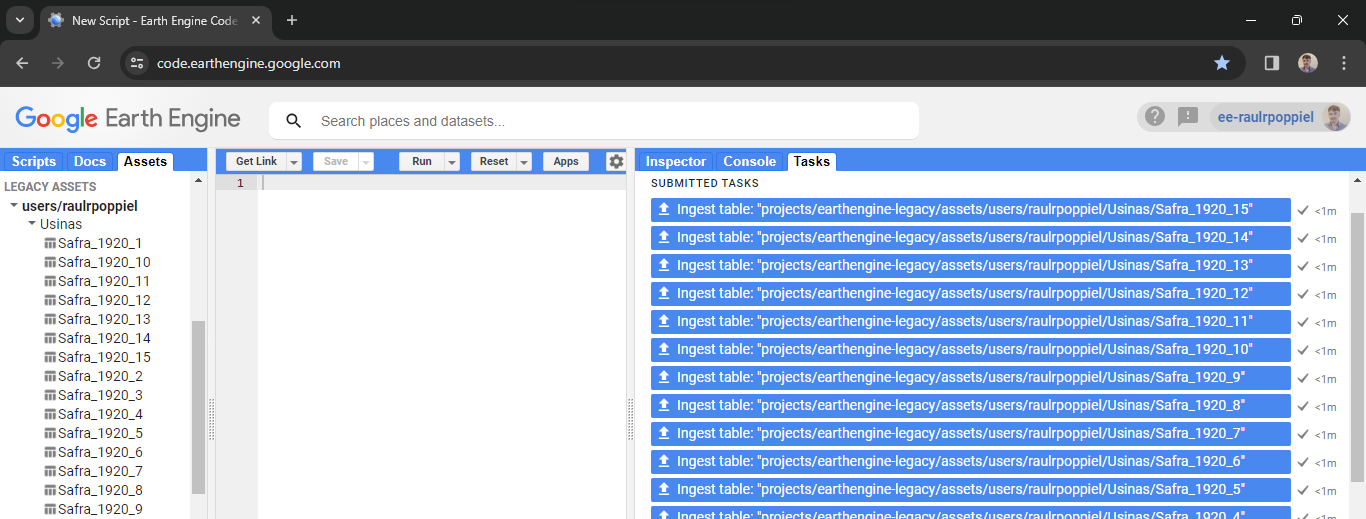